# 8 August 22

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Data/sp500data.csv')
df['Open Log return'] = np.log(df['Open']/df['Open'].shift(1))
df['High Log return'] = np.log(df['High']/df['High'].shift(1))
df['Low Log return'] = np.log(df['Low']/df['Low'].shift(1))
df['Close Log return'] = np.log(df['Close']/df['Close'].shift(1))
df

,Date,Time,Open,High,Low,Close,Open Log return,High Log return,Low Log return,Close Log return
0,1985-01-02,09:02:00,167.20,167.20,167.13,167.13,NaN,NaN,NaN,NaN
1,1985-01-02,09:03:00,167.07,167.07,167.07,167.07,-0.000778,-0.000778,-0.000359,-0.000359
2,1985-01-02,09:04:00,167.03,167.03,167.03,167.03,-0.000239,-0.000239,-0.000239,-0.000239
3,1985-01-02,09:05:00,166.94,166.94,166.94,166.94,-0.000539,-0.000539,-0.000539,-0.000539
4,1985-01-02,09:06:00,166.93,166.93,166.93,166.93,-0.000060,-0.000060,-0.000060,-0.000060
...,...,...,...,...,...,...,...,...,...,...
3637381,2021-12-02,15:17:00,4577.10,4577.10,4577.10,4577.10,0.000000,0.000000,0.000000,0.000000
3637382,2021-12-02,15:18:00,4577.10,4577.10,4577.10,4577.10,0.000000,0.000000,0.000000,0.000000
3637383,2021-12-02,15:19:00,4577.10,4577.10,4577.10,4577.10,0.000000,0.000000,0.000000,0.000000
3637384,2021-12-02,15:20:00,4577.10,4577.10,4577.10,4577.10,0.000000,0.000000,0.000000,0.000000


In [3]:
o = df.pivot_table(values='Open', index='Date', columns='Time')
h = df.pivot_table(values='High', index='Date', columns='Time')
l = df.pivot_table(values='Low', index='Date', columns='Time')
cl = df.pivot_table(values='Close', index='Date', columns='Time')
ro = df.pivot_table(values='Open Log return', index='Date', columns='Time')
rh=df.pivot_table(values='High Log return', index='Date', columns='Time')
rl=df.pivot_table(values='Low Log return', index='Date', columns='Time')
rcl=df.pivot_table(values='Close Log return', index='Date', columns='Time')
o = o.loc['2010-01-01':'2020-12-31',:]
h = h.loc['2010-01-01':'2020-12-31',:]
l = l.loc['2010-01-01':'2020-12-31',:]
cl = cl.loc['2010-01-01':'2020-12-31',:]
ro = ro.loc['2010-01-01':'2020-12-31',:]
rh = rh.loc['2010-01-01':'2020-12-31',:]
rl = rl.loc['2010-01-01':'2020-12-31',:]
rcl = rcl.loc['2010-01-01':'2020-12-31',:]
o = o.dropna()
h = h.dropna()
l = l.dropna()
cl = cl.dropna()
ro = ro.dropna()
rh = rh.dropna()
rl = rl.dropna()
rcl = rcl.dropna()

In [12]:
def GeneratePrice2(op, high, low, close, rop, rhigh, rlow, rclose):
    o1 = np.zeros([op.shape[0], op.shape[1]])
    h1 = np.zeros([high.shape[0], high.shape[1]])
    l1 = np.zeros([low.shape[0], low.shape[1]])
    cl1 = np.zeros([close.shape[0], close.shape[1]])
    o1[:, 0] = 1
    h1[:, 0] = o1[:, 0] + (high[:, 0]-op[:, 0])/op[:,0]
    l1[:, 0] = o1[:, 0] + (low[:, 0]-op[:, 0])/op[:,0]
    cl1[:, 0] = o1[:, 0] + (close[:, 0]-op[:, 0])/op[:,0]
    for i in range(1, op.shape[1]):
        o1[:, i] = o1[:, i-1] * (op[:,i]/op[:, i-1])
        h1[:, i] = h1[:, i-1] * (high[:, i]/high[:, i-1])
        l1[:, i] = l1[:, i-1] * (low[:, i]/low[:, i-1])
        cl1[:, i] = cl1[:, i-1] * (close[:, i]/close[:, i-1])
    return o1, h1, l1, cl1

In [13]:
def TimeSeriesPlot2(x, y1, y2, y3, y4, pathNum, stop, label1=None, label2=None, label3=None, label4=None, legend=True, ylabel=None):
    plt.figure(figsize=(8, 5), dpi=500)
    plt.plot(x[x <= stop], y1[pathNum, x <= stop], label=label1)
    plt.plot(x[x <= stop], y2[pathNum, x <= stop], label=label2)
    plt.plot(x[x <= stop], y3[pathNum, x <= stop], label=label3)
    plt.plot(x[x <= stop], y4[pathNum, x <= stop], label=label4)
    plt.xlim([0, stop])
    # plt.ylim([1.06, 1.11])
    plt.ylabel(ylabel)
    plt.xlabel('Time')
    if legend:
        plt.legend()
    plt.show()
    
t = np.linspace(0, 1, 411)
p = GeneratePrice2(o.values, h.values, l.values, cl.values, ro.values, rh.values, rl.values, rcl.values)

In [18]:
np.savetxt('sp500 open time series.txt', o.values, fmt='%1.4f')
np.savetxt('sp500 high time series.txt', h.values, fmt='%1.4f')
np.savetxt('sp500 low time series.txt', l.values, fmt='%1.4f')
np.savetxt('sp500 close time series.txt', cl.values, fmt='%1.4f')
np.savetxt('sp500 ropen time series.txt', ro.values, fmt='%1.4f')
np.savetxt('sp500 rhigh time series.txt', rh.values, fmt='%1.4f')
np.savetxt('sp500 rlow time series.txt', rl.values, fmt='%1.4f')
np.savetxt('sp500 rclose time series.txt', rcl.values, fmt='%1.4f')

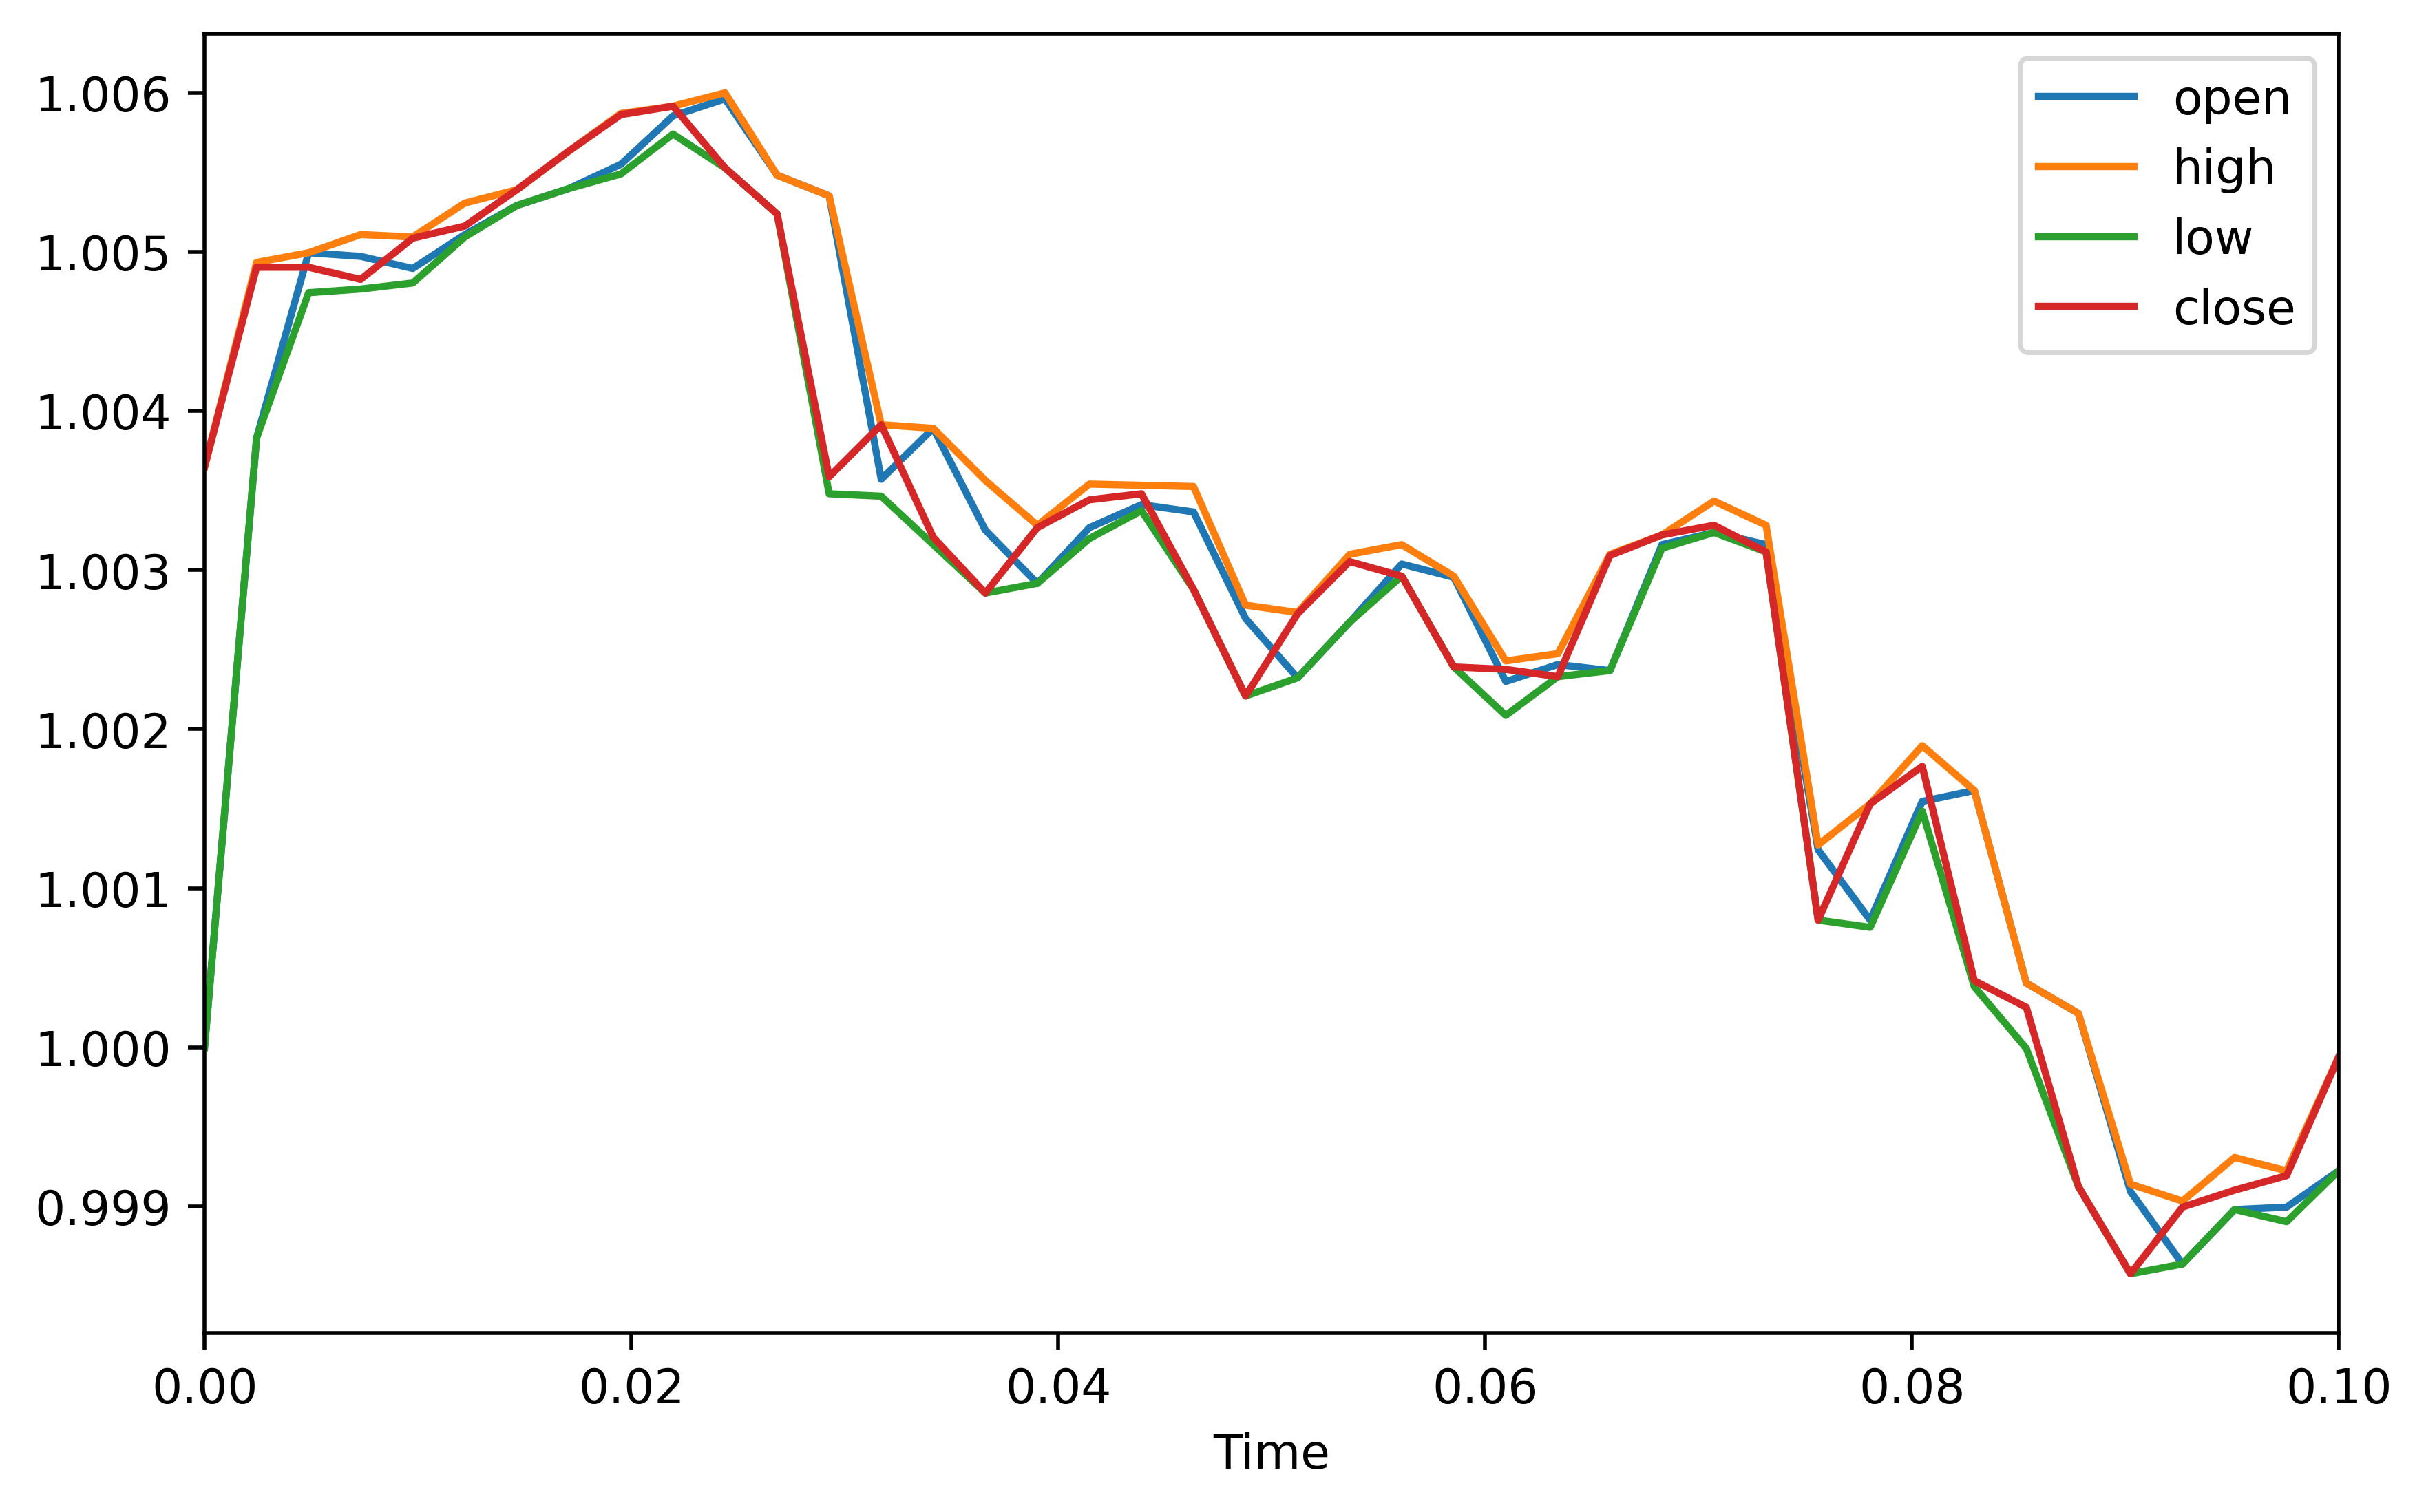

In [17]:
TimeSeriesPlot2(t, p[0], p[1], p[2], p[3],56,0.1, 'open', 'high', 'low', 'close')

In [8]:
p[1]

array([[1.        , 1.00074307, 1.00178089, ..., 1.0836682 , 1.0836682 ,
        1.0836682 ],
       [1.00408367, 1.00408367, 1.00408367, ..., 1.08046638, 1.08046638,
        1.08046638],
       [1.        , 1.        , 1.        , ..., 1.09054816, 1.09054816,
        1.09054816],
       ...,
       [1.00162933, 1.00164797, 1.00190371, ..., 1.05119215, 1.05119215,
        1.05119215],
       [1.00117499, 1.00178197, 1.00205454, ..., 1.03905099, 1.03905099,
        1.03905099],
       [1.        , 1.00011789, 1.00011789, ..., 1.04370484, 1.04370484,
        1.04370484]])

In [6]:
l

Time,08:31:00,08:32:00,08:33:00,08:34:00,08:35:00,08:36:00,08:37:00,08:38:00,08:39:00,08:40:00,...,15:12:00,15:13:00,15:14:00,15:15:00,15:16:00,15:17:00,15:18:00,15:19:00,15:20:00,15:21:00
Date,,,,,,,,,,,,,,,,,,,,,
2011-11-07,1251.93,1251.56,1252.63,1252.85,1252.99,1253.87,1255.89,1255.86,1255.84,1255.75,...,1261.12,1261.12,1261.12,1261.12,1261.12,1261.12,1261.12,1261.12,1261.12,1261.12
2011-11-08,1261.12,1265.93,1265.98,1266.45,1266.62,1265.50,1265.33,1265.05,1264.60,1264.60,...,1275.92,1275.92,1275.92,1275.92,1275.92,1275.92,1275.92,1275.92,1275.92,1275.92
2011-11-09,1259.73,1253.37,1249.97,1246.95,1247.02,1247.81,1248.03,1247.91,1247.35,1247.46,...,1229.10,1229.10,1229.10,1229.10,1229.10,1229.10,1229.10,1229.10,1229.10,1229.10
2011-11-10,1229.59,1240.30,1243.39,1244.43,1243.62,1242.53,1242.19,1241.99,1241.34,1241.47,...,1239.70,1239.70,1239.70,1239.70,1239.70,1239.70,1239.70,1239.70,1239.70,1239.70
2011-11-11,1240.12,1252.14,1255.41,1256.86,1255.45,1255.64,1255.92,1255.75,1256.18,1256.41,...,1263.85,1263.85,1263.85,1263.85,1263.85,1263.85,1263.85,1263.85,1263.85,1263.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,3693.42,3700.43,3700.32,3701.06,3700.37,3700.57,3703.18,3702.90,3702.91,3702.79,...,3690.01,3690.01,3690.01,3690.01,3690.01,3690.01,3690.01,3690.01,3690.01,3690.01
2020-12-28,3723.03,3729.05,3726.62,3726.52,3726.39,3728.04,3727.91,3726.96,3726.45,3726.50,...,3735.36,3735.36,3735.36,3735.36,3735.36,3735.36,3735.36,3735.36,3735.36,3735.36
2020-12-29,3750.01,3753.39,3753.01,3754.34,3754.93,3754.09,3752.77,3750.59,3750.40,3751.11,...,3727.04,3727.04,3727.04,3727.04,3727.04,3727.04,3727.04,3727.04,3727.04,3727.04
